# Código

## Oil-spill classification dataset unique values

In [1]:
# summarize the number of unique values for each column using numpy
from urllib.request import urlopen
from numpy import loadtxt
from numpy import unique
# define the location of the dataset
path = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/oil-spill.csv'
# load the dataset
data = loadtxt(urlopen(path), delimiter=',')
# summarize the number of unique values in each column
for i in range(data.shape[1]):
	print(i, len(unique(data[:, i])))

0 238
1 297
2 927
3 933
4 179
5 375
6 820
7 618
8 561
9 57
10 577
11 59
12 73
13 107
14 53
15 91
16 893
17 810
18 170
19 53
20 68
21 9
22 1
23 92
24 9
25 8
26 9
27 308
28 447
29 392
30 107
31 42
32 4
33 45
34 141
35 110
36 3
37 758
38 9
39 9
40 388
41 220
42 644
43 649
44 499
45 2
46 937
47 169
48 286
49 2


## Simpler approach

In [2]:
# summarize the number of unique values for each column using numpy
from pandas import read_csv
# define the location of the dataset
path = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/oil-spill.csv'
# load the dataset
df = read_csv(path, header=None)
# summarize the number of unique values in each column
print(df.nunique())

0     238
1     297
2     927
3     933
4     179
5     375
6     820
7     618
8     561
9      57
10    577
11     59
12     73
13    107
14     53
15     91
16    893
17    810
18    170
19     53
20     68
21      9
22      1
23     92
24      9
25      8
26      9
27    308
28    447
29    392
30    107
31     42
32      4
33     45
34    141
35    110
36      3
37    758
38      9
39      9
40    388
41    220
42    644
43    649
44    499
45      2
46    937
47    169
48    286
49      2
dtype: int64


## Delete Columns That Contain a Single Value

In [4]:
# delete columns with a single unique value
from pandas import read_csv
# define the location of the dataset
path = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/oil-spill.csv'
# load the dataset
df = read_csv(path, header=None)
print(df.shape)
# get number of unique values for each column
counts = df.nunique()
# record columns to delete
to_del = [i for i,v in enumerate(counts) if v == 1]
print(to_del)
# drop useless columns
df.drop(to_del, axis=1, inplace=True)
print(df.shape)

(937, 50)
[22]
(937, 49)


## Consider Columns That Have Very Few Values

In [5]:
# summarize the percentage of unique values for each column using numpy
from urllib.request import urlopen
from numpy import loadtxt
from numpy import unique
# define the location of the dataset
path = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/oil-spill.csv'
# load the dataset
data = loadtxt(urlopen(path), delimiter=',')
# summarize the number of unique values in each column
for i in range(data.shape[1]):
	num = len(unique(data[:, i]))
	percentage = float(num) / data.shape[0] * 100
	print('%d, %d, %.1f%%' % (i, num, percentage))

0, 238, 25.4%
1, 297, 31.7%
2, 927, 98.9%
3, 933, 99.6%
4, 179, 19.1%
5, 375, 40.0%
6, 820, 87.5%
7, 618, 66.0%
8, 561, 59.9%
9, 57, 6.1%
10, 577, 61.6%
11, 59, 6.3%
12, 73, 7.8%
13, 107, 11.4%
14, 53, 5.7%
15, 91, 9.7%
16, 893, 95.3%
17, 810, 86.4%
18, 170, 18.1%
19, 53, 5.7%
20, 68, 7.3%
21, 9, 1.0%
22, 1, 0.1%
23, 92, 9.8%
24, 9, 1.0%
25, 8, 0.9%
26, 9, 1.0%
27, 308, 32.9%
28, 447, 47.7%
29, 392, 41.8%
30, 107, 11.4%
31, 42, 4.5%
32, 4, 0.4%
33, 45, 4.8%
34, 141, 15.0%
35, 110, 11.7%
36, 3, 0.3%
37, 758, 80.9%
38, 9, 1.0%
39, 9, 1.0%
40, 388, 41.4%
41, 220, 23.5%
42, 644, 68.7%
43, 649, 69.3%
44, 499, 53.3%
45, 2, 0.2%
46, 937, 100.0%
47, 169, 18.0%
48, 286, 30.5%
49, 2, 0.2%


In [6]:
# summarize the percentage of unique values for each column using numpy
from urllib.request import urlopen
from numpy import loadtxt
from numpy import unique
# define the location of the dataset
path = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/oil-spill.csv'
# load the dataset
data = loadtxt(urlopen(path), delimiter=',')
# summarize the number of unique values in each column
for i in range(data.shape[1]):
	num = len(unique(data[:, i]))
	percentage = float(num) / data.shape[0] * 100
	if percentage < 1:
		print('%d, %d, %.1f%%' % (i, num, percentage))

21, 9, 1.0%
22, 1, 0.1%
24, 9, 1.0%
25, 8, 0.9%
26, 9, 1.0%
32, 4, 0.4%
36, 3, 0.3%
38, 9, 1.0%
39, 9, 1.0%
45, 2, 0.2%
49, 2, 0.2%


In [9]:
# delete columns where number of unique values is less than 1% of the rows
from pandas import read_csv
# define the location of the dataset
path = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/oil-spill.csv'
# load the dataset
df = read_csv(path, header=None)
print(df.shape)
# get number of unique values for each column
counts = df.nunique()
# record columns to delete
to_del = [i for i,v in enumerate(counts) if (float(v)/df.shape[0]*100) < 1]
print(to_del)
# drop useless columns
df.drop(to_del, axis=1, inplace=True)
print(df.shape)

(937, 50)
[21, 22, 24, 25, 26, 32, 36, 38, 39, 45, 49]
(937, 39)


## Remove Columns That Have A Low Variance

In [10]:
# example of apply the variance threshold
from pandas import read_csv
from sklearn.feature_selection import VarianceThreshold
# define the location of the dataset
path = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/oil-spill.csv'
# load the dataset
df = read_csv(path, header=None)
# split data into inputs and outputs
data = df.values
X = data[:, :-1]
y = data[:, -1]
print(X.shape, y.shape)
# define the transform
transform = VarianceThreshold()
# transform the input data
X_sel = transform.fit_transform(X)
print(X_sel.shape)

(937, 49) (937,)
(937, 48)


(937, 49) (937,)
>Threshold=0.00, Features=48
>Threshold=0.01, Features=42
>Threshold=0.02, Features=40
>Threshold=0.03, Features=40
>Threshold=0.04, Features=40
>Threshold=0.05, Features=37
>Threshold=0.06, Features=37
>Threshold=0.07, Features=37
>Threshold=0.08, Features=37
>Threshold=0.09, Features=36
>Threshold=0.10, Features=36
>Threshold=0.11, Features=36
>Threshold=0.12, Features=35
>Threshold=0.13, Features=35
>Threshold=0.14, Features=35
>Threshold=0.15, Features=35
>Threshold=0.16, Features=35
>Threshold=0.17, Features=35
>Threshold=0.18, Features=35
>Threshold=0.19, Features=35
>Threshold=0.20, Features=35
>Threshold=0.21, Features=35
>Threshold=0.22, Features=35
>Threshold=0.23, Features=35
>Threshold=0.24, Features=35
>Threshold=0.25, Features=35
>Threshold=0.26, Features=35
>Threshold=0.27, Features=35
>Threshold=0.28, Features=35
>Threshold=0.29, Features=35
>Threshold=0.30, Features=35
>Threshold=0.31, Features=35
>Threshold=0.32, Features=35
>Threshold=0.33, Features=

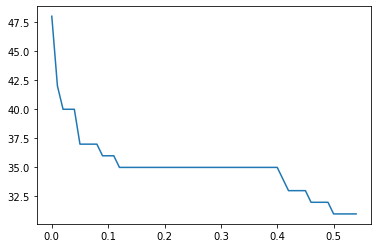

In [13]:
# explore the effect of the variance thresholds on the number of selected features
from numpy import arange
from pandas import read_csv
from sklearn.feature_selection import VarianceThreshold
from matplotlib import pyplot
# define the location of the dataset
path = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/oil-spill.csv'
# load the dataset
df = read_csv(path, header=None)
# split data into inputs and outputs
data = df.values
X = data[:, :-1]
y = data[:, -1]
print(X.shape, y.shape)
# define thresholds to check
thresholds = arange(0.0, 0.55, 0.01)
# apply transform with each threshold
results = list()
for t in thresholds:
	# define the transform
	transform = VarianceThreshold(threshold=t)
	# transform the input data
	X_sel = transform.fit_transform(X)
	# determine the number of input features
	n_features = X_sel.shape[1]
	print('>Threshold=%.2f, Features=%d' % (t, n_features))
	# store the result
	results.append(n_features)
# plot the threshold vs the number of selected features
pyplot.plot(thresholds, results)
pyplot.show()

## Identify Rows That Contain Duplicate Data

In [14]:
# locate rows of duplicate data
from pandas import read_csv
# define the location of the dataset
path = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv'
# load the dataset
df = read_csv(path, header=None)
# calculate duplicates
dups = df.duplicated()
# report if there are any duplicates
print(dups.any())
# list all duplicate rows
print(df[dups])

True
       0    1    2    3               4
34   4.9  3.1  1.5  0.1     Iris-setosa
37   4.9  3.1  1.5  0.1     Iris-setosa
142  5.8  2.7  5.1  1.9  Iris-virginica


## Delete Rows That Contain Duplicate Data

In [15]:
# delete rows of duplicate data from the dataset
from pandas import read_csv
# define the location of the dataset
path = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv'
# load the dataset
df = read_csv(path, header=None)
print(df.shape)
# delete duplicate rows
df.drop_duplicates(inplace=True)
print(df.shape)

(150, 5)
(147, 5)


# Comentarios del ejercicio

En general, lo que más me llevo del ejercicio -más allá de las facilidades que provee Python- es lo importante que es tomar en cuenta aspectos básicos a la ahora de limpiar los datos. El paso inicial siempre será aspectos básicos como tomar en cuenta filas duplicadas (donde generalmente se borrarán), o columnas con varianzas cercanas a 0 (columnas con pocos valores únicos). Luego de tener buenos cimientos, se puede pensar en técnicas más avanzadas y continuar con el procedimiento para conseguir el modelo planeado.

Para recalcar nuevamente, me queda aún más claro que Python provee muchas facilidades para poder hacer pruebas de concepto y testear el dataset. Funciones como para obtener la varianza, obtener la cantidad de valores únicos, y remover filas duplicadas (con un solo llamado a un método) hacen ver lo importante que es Python para realizar este tipos de proyectos.

En mi vida profesional, es muy probable que use la librería "pandas" y "numpy" ya que brinda muchas facilidades para iniciar y hacer análisis rápidos de datasets. Y, por supuesto, iniciar con los pasos para tratar con los datos crudos.